BUILD A RECOMMENDATION SYSTEM
USING COLLABORATIVE FILTERING
OR MATRIX FACTORIZATION
TECHNIQUES.

DELIVERABLE: A NOTEBOOK OR APP
SHOWCASING RECOMMENDATION
RESULTS AND EVALUATION METRICS.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=17, validation_split=0.2)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/17
 570/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8096 - loss: 0.5378

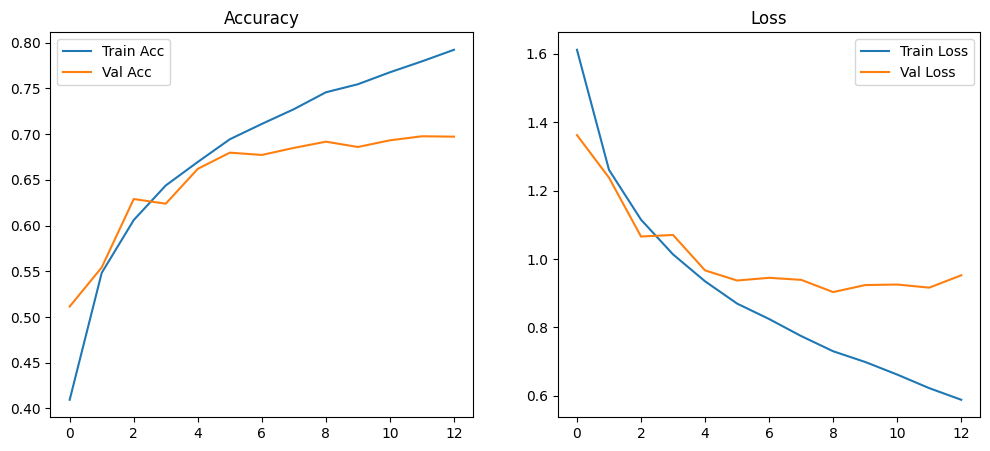

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


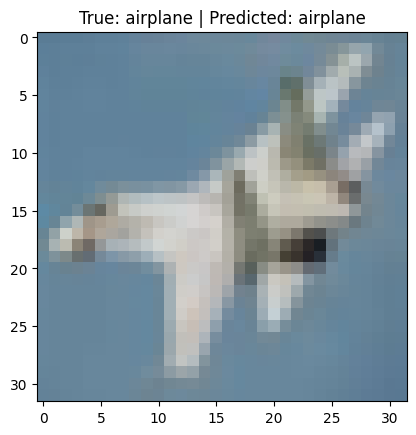

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Step 8: Predict a Sample Image
predictions = model.predict(X_test)
index = 10
plt.imshow(X_test[index])
plt.title(f"True: {class_names[y_test[index][0]]} | Predicted: {class_names[np.argmax(predictions[index])]}")
plt.show()